In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor


from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

from sklearn.model_selection import cross_val_score

In [2]:
dataset=pd.read_csv('D:\Dataset\Chem_Learning\CLC_train.csv')
test_dataset = pd.read_csv('D:\Dataset\Chem_Learning\CLC_test.csv')

dataset = shuffle(dataset)
test_dataset = shuffle(test_dataset)

# y_train = dataset.CO_level
# y_test = test_dataset.CO_level

In [3]:
features = ['CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH']
X = dataset[features]
X_test = test_dataset[features]

y = dataset['CO_level']
y_test = test_dataset['CO_level']

ind_var = dataset.iloc[:,2:15]
tar_var = dataset.iloc[:,15]


In [4]:
# labelencoder = LabelEncoder()
# label_y_train = labelencoder.fit_transform(y_train)
# label_y_test = labelencoder.transform(y_test)

y_complete = y.values
ytest = y_test.values

# Apply one-hot encoder on output column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
y = pd.DataFrame(OH_encoder.fit_transform(y_complete.reshape(-1,1)))

y_test = pd.DataFrame(OH_encoder.transform(ytest.reshape(-1,1)))
y_test

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1867,1.0,0.0,0.0,0.0,0.0
1868,1.0,0.0,0.0,0.0,0.0
1869,1.0,0.0,0.0,0.0,0.0
1870,0.0,0.0,0.0,0.0,1.0


In [5]:
#Spltting the dataset into training and validation sets
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=0)

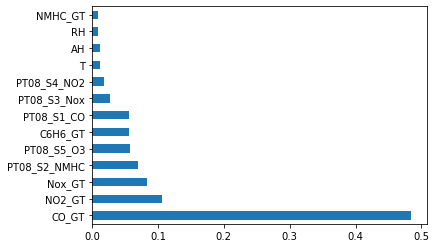

In [6]:
model = ExtraTreesClassifier()
model.fit(ind_var , tar_var)
feat_importances = pd.Series(model.feature_importances_ , index = X_train.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [7]:
# X_train = X_train.drop('NMHC_GT',axis =1,inplace=True)
# X_val = X_val.drop('NMHC_GT',axis =1,inplace=True)
# X_test = X_test.drop('NMHC_GT',axis =1,inplace=True)

# X_train

In [8]:
imputer = SimpleImputer(missing_values = -200 ,strategy ="mean")

imputed_X_train = pd.DataFrame(imputer.fit_transform(X_train))
imputed_X_val = pd.DataFrame(imputer.transform(X_val))

imputed_X_test = pd.DataFrame(imputer.fit_transform(X_test))

imputed_X_train.columns = X_train.columns
imputed_X_val.columns = X_val.columns
imputed_X_test.columns = X_test.columns

In [9]:
# #new_approach_not_using ##


# cols_with_missing_values = [];
# for col in X_train.columns:
#     if(X_train[col].isnull().any()):
#         cols_with_missing_values.append(col)
        
# X_train_aux = X_train.copy()
# X_val_aux = X_test.copy()

# for col in cols_with_missing_values:
#     X_train_aux[col + '_was_missing'] = X_train_aux[col].isnull()
#     X_test_aux[col + '_was_missing'] = X_test_aux[col].isnull()
    
# my_imputer = SimpleImputer(missing_values = -200 ,strategy = 'most_frequent',verbose=0)
# imputed_X_train_aux = pd.DataFrame(my_imputer.fit_transform(X_train_aux))
# imputed_X_test_aux = pd.DataFrame(my_imputer.transform(X_test_aux))

# imputed_X_train_aux.columns = X_test_aux.columns
# imputed_X_test_aux.columns = X_test_aux.columns

In [10]:
# my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
#                               ('model', RandomForestRegressor(n_estimators=50,
#                                                               random_state=0))
#                              ])

In [11]:
classifier = RandomForestClassifier(n_estimators=12, criterion ='entropy' ,random_state =0)
classifier.fit(imputed_X_train,y_train)
# classifier = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
# classifier.fit(imputed_X_train, y_train, 
#              early_stopping_rounds=5, 
#              eval_set=[(X_val, y_val)]) 
#              #verbose=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
y_pred = classifier.predict(imputed_X_val)
y_pred = y_pred.astype('int32')

# y_val
# y_test

# y_val_arr = y_val.to_numpy()
# y_val_arr = y_val_arr.astype('int32')
# len(y_pred)

# y_pred[1].any()

In [13]:
#Predicting the test results
y_pred_1 = []
y_val_1 = []

for i in range(len(y_pred)):
    for j in range(0,5):
        if(y_pred[i][j]):
            y_pred_1.append(j)
            
    if(y_pred[i].any()==False):
        y_pred_1.append(4)
            

y_val_arr = y_val.to_numpy()
y_val_arr = y_val_arr.astype('int32')

for i in range(len(y_val_arr)):
    for j in range(0,5):
        if(y_val_arr[i][j]):
            y_val_1.append(j)


confusion_matrix(y_val_1, y_pred_1)

array([[911,   0,   2,   0,   6],
       [  0, 242,   0,   0,   2],
       [  0,   0,  43,   0,   2],
       [  3,   0,   0,   0,   1],
       [  1,   0,   0,   0, 284]], dtype=int64)

In [14]:
classifier = RandomForestClassifier(n_estimators=12, criterion ='entropy' ,random_state =0)
classifier.fit(imputed_X_test,y_test)

y_pred_test = classifier.predict(imputed_X_test)
y_pred_test = y_pred_test.astype('int32')
len(y_pred_test)

1872

In [15]:
y_pred_2 = []
y_test_2 = []

for i in range(len(y_pred_test)):
    for j in range(0,5):
        if(y_pred_test[i][j]):
            y_pred_2.append(j)
            
    if(y_pred_test[i].any()==False):
        y_pred_2.append(4)
            

y_test_arr = y_test.to_numpy()
y_test_arr = y_test_arr.astype('int32')

for i in range(len(y_test_arr)):
    for j in range(0,5):
        if(y_test_arr[i][j]):
            y_test_2.append(j)


cm = confusion_matrix(y_test_2, y_pred_2)
cm

array([[1160,    0,    0,    0,    0],
       [   0,  311,    0,    0,    0],
       [   0,    0,   58,    0,    3],
       [   0,    0,    0,    2,    1],
       [   0,    0,    0,    0,  337]], dtype=int64)